# Linear regression on Boston Housing Data

Шаги взяты с [Cross Industry Standard Processing for Data Mining](https://en.wikipedia.org/wiki/Cross_Industry_Standard_Process_for_Data_Mining):

1. Business Understanding
1. Data Understanding
1. Data Preparation
1. Modeling
1. Evaluation
1. Deployment

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/599px-CRISP-DM_Process_Diagram.png)


## 1. Business Understanding



**Цель:** 

1. Определить что делает недвижимость ценной?
1. Какая цена конкретного дома? 

## 2. Data Understanding

Мы должны собрать как можно больше данных для лучшего их понимания (обнаружения корреляций, определения их качества, выдвижения гипотез)

Другие ресурсы из которых мы можем взять данные:

* [Realtor.com - Boston MA](http://www.realtor.com/realestateandhomes-search/Boston_MA)
* [Zillow API](http://www.zillow.com/howto/api/APIOverview.htm)
* [ProgrammableWeb API - Real Estate](http://www.programmableweb.com/category/real-estate)

*В этом случае датасет уже почищен и не нуждается в дополнительных данных

In [28]:
## import statements
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.cross_validation import cross_val_predict
from sklearn import linear_model


In [2]:
boston_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [4]:
df = pd.read_csv("data/boston/housing.data", sep='\s+', names=boston_cols)

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


See UCI Data page: https://archive.ics.uci.edu/ml/datasets/Housing


Data Columns:

1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per \$10,000 
11. PTRATIO: pupil-teacher ratio by town 
12. B: $1000(Bk - 0.63)^2$ where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. MEDV: Median value of owner-occupied homes in \$1000's

Let's explore the data a bit, make some interactive plots and build a classifier for the data.
 

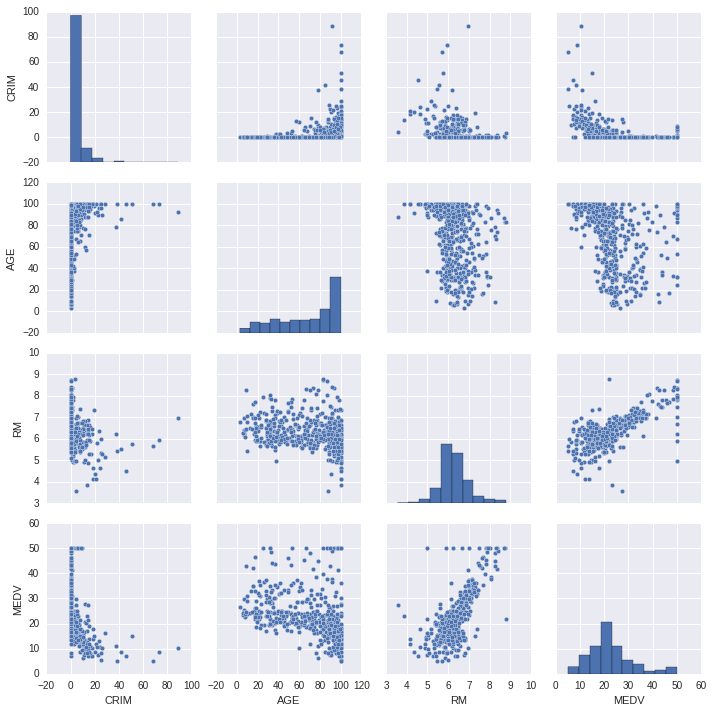

In [29]:
sns.pairplot(df[["CRIM", "AGE", "RM", "MEDV"]])

## 3. Data Preparation

* У нас есть пропущенные данные?
* Нам нужно кодировать категориальные переменные?
* Есть ли исключения?
* Влезут ли наши данные в память или нам их нужно разбивать на части?


In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 4. Modeling

На этом этапе выбираются и применяются различные методы моделирования, и их параметры калибруются для оптимальных значений. Как правило, существует несколько методов для того же типа задачи. Некоторые методы имеют специфические требования к форме данных. Поэтому, часто требуется дополнительная подготовка данных.

Рассмотрим линейную регрессию:[LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model to understand the concepts behind regression. 

* X - матрица известных переменных 
* y - переменная-цель (target variable)

### Алгоритм

Большинство знакомы с уравнением линии:

$$y = mx + b$$

Например, у нас есть стенд с лимонадом. Мы могли бы сделать действительно простую модель, говоря, что доход от лимонада равен цене, продажам и аренде. Мы могли бы упростить это к линейному уравнению, который выглядит следующим образом

$$PredictedRevenue = (Sales * Price) - Rent$$


Но чтобы продавать лимонад, нужны не только продажи и цены. Мы могли бы учитывать другие переменные, такие как изменения цен, продаж, температуры и пешеходного движения. Мы могли бы создать более сложную модель, которая будет выглядеть примерно так.


$$PredictedRevenue = (Sales * Weight) + ( Price * Weight) + (Temperature * Weight) + (FootTraffic * Weight) - Rent$$

Весы в примере - это коэфициенты. Используя [Multiple Linear Regression](https://en.wikipedia.org/wiki/Linear_regression) мы можем посчитать эти коэфициенты. 


Используем 13 переменных для того что бы предсказать цену дома:

$$\hat{Y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + ... \beta_n N$$

$$PredictedPrice = Intercept + (Known CRIM * coefficient) + (Known ZN * coefficient) + ... (Known N * coefficient)$$

![](https://upload.wikimedia.org/wikipedia/en/1/13/Linear_regression.png)

In [35]:
X = df
boston = datasets.load_boston()
y = boston.target

from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X, y)
print('Estimated intercept coefficent:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))

Estimated intercept coefficent: 2.84217094304e-14
Number of coefficients: 14


In [36]:
# def predict_house(crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat):
#     return lm.intercept_ + lm.coef_[0] * crim \
#             + zn * lm.coef_[1] \
#             + indus * lm.coef_[2] \
#             + chas * lm.coef_[3] \
#             + nox * lm.coef_[4] \
#             + rm * lm.coef_[5] \
#             + age * lm.coef_[6] \
#             + dist * lm.coef_[7] \
#             + rad * lm.coef_[8] \
#             + tax * lm.coef_[9] \
#             + ptratio * lm.coef_[10] \
#             + b * lm.coef_[11] \
#             + lstat * lm.coef_[12]
       
    
#print(X.iloc[[41]].values)
#print(y[41])
print("Predicted House price", lm.predict(X)[41] * 1000)
print("Equation house price", (lm.intercept_ + np.dot(lm.coef_, X.iloc[[41]].values[0])) * 1000)
print("Target price", y[41] * 1000)

print("Residual price", (lm.predict(X)[41] - y[41]) * 1000)

print("R^2 =", lm.score(X, y))


Predicted House price 26600.0
Equation house price 26600.0
Target price 26600.0
Residual price -1.42108547152e-11
R^2 = 1.0


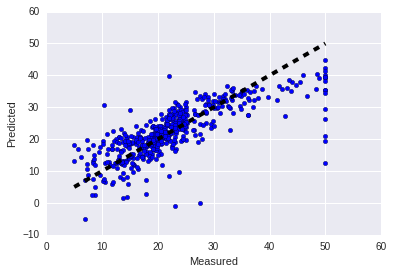

In [31]:
predicted = cross_val_predict(lm, boston.data, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [27]:
errors = {}
for feature in boston.feature_names:
    lm = LinearRegression()
    lm.fit(X[[feature]], y)
    mean_squared_error = np.mean((y - lm.predict(X[[feature]])) ** 2)
    errors[feature] = mean_squared_error
errors = sorted(errors.items(), key=lambda x: x[1])

print("Features that Minimize Error")
print(30 * "-")
for e in errors:
    print(e[0], "\t", e[1])

Features that Minimize Error
------------------------------
LSTAT 	 38.4829672299
RM 	 43.6005517712
PTRATIO 	 62.6522000138
INDUS 	 64.6662216411
TAX 	 65.8872753368
NOX 	 69.0042883554
CRIM 	 71.690735882
RAD 	 72.1248118808
AGE 	 72.423980929
ZN 	 73.4516960948
B 	 75.0324292075
DIS 	 79.1463415861
CHAS 	 81.8265141193


## 5. Evaluation

На данном этапе мы построили модель (или модели), которые, как представляется, имеют хорошее качество, с точки зрения анализа данных. Прежде чем приступить к окончательному развертыванию модели, важно более тщательно оценить модель, и рассмотрим шаги, выполняемые для построения модели, чтобы быть уверенным, что бизнес-цели достигнуты. Ключевая цель состоит в том, чтобы определить, есть ли какой-то важный вопрос бизнеса, который не был в достаточной степени рассмотрен. В конце этого этапа, решение об использовании результатов должно быть достигнуто.

Давайте снова посмотрим на бизнес-цели:

* ~~ Что такое справедливая цена за дом ~~? - Теперь у нас есть модель, которая даст нам прогнозируемой цены. Это не могло бы быть совершенно точным, но это даст нам
* ~~ Определите, что делает дом ценным? ~~ Мы знаем, что функции, которые сведены к минимуму ошибки были LSTAT, RM, PTRATIO



## 6. Deployment

Creation of the model is generally not the end of the project. Even if the purpose of the model is to increase knowledge of the data, the knowledge gained will need to be organized and presented in a way that is useful to the customer. Depending on the requirements, the deployment phase can be as simple as generating a report or as complex as implementing a repeatable data scoring (e.g. segment allocation) or data mining process. In many cases it will be the customer, not the data analyst, who will carry out the deployment steps. Even if the analyst deploys the model it is important for the customer to understand up front the actions which will need to be carried out in order to actually make use of the created models.


* What would deploying this model look like?
* Where would we deploy this model? Excel, Website, App?
* Should we deploy this model?
* What is the cost of inaccuracy? 


Создание модели, как правило, не является концом. Даже если цель данной модели является повышение уровня знаний о данных, полученные знания должны быть организованы и представлены таким образом, который полезен клиенту. В зависимости от требований, фаза развертывания может быть столь же простой, как создание отчета или же сложной, как реализация повторяемого скоринга данных (например, распределение сегментов). Во многих случаях это будет клиент, который будей осуществлять шаги по развертыванию. Даже если аналитик развертывает модель очень важно для клиента, чтобы понять фронт действий, которые должны будут проводиться для того, чтобы реально использовать созданные модели.


* Что представляет из себя процес деплоймента?
* Где бы мы развернуть эту модель? Excel, веб-сайт, приложение?
* Должны ли мы развернуть эту модель?
* Какова стоимость неточность?


### Links

1. https://gist.github.com/jpotts18/dac94dc9514172ce020c
2. https://github.com/aterrel/pydata101/blob/master/examples/BostonHousingData.ipynb
